In [1]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup 
import urllib.request
import warnings 
warnings.filterwarnings('ignore')
web = 'http://www.sports-reference.com/olympics/summer/'
req = urllib.request.Request(web)
page = urllib.request.urlopen(req)
soup = BeautifulSoup(page,'lxml')

In [2]:
print(soup.prettify())

<!DOCTYPE html>
<html data-version="the-magglio-475" itemscope="" itemtype="http://schema.org/website" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <title>
   Summer Games Index | Olympics at Sports-Reference.com
  </title>
  <link href="http://d2ft4b0ve1aur1.cloudfront.net" rel="dns-prefetch"/>
  <link href="" rel="dns-prefetch"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/201712181/bak/sr-oly-min.js.jgz" rel="subresource"/>
  <script type="text/javascript">
   var sr_gzipEnabled = false; var sr_js_loader = new Array();
  </script>
  <script src="https://d2p3bygnnzw9w3.cloudfront.net/req/201712181/bak/sr.gzipcheck.js.jgz" type="text/javascript">
  </script>
  <noscript>
   <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/201712181/bak/sr-oly-min.css" rel="stylesheet" type="text/css"/>
  </noscript>
  <script type="text/javascrip

In [3]:
table = soup.find("table",{"id":"Summer"})
print(table)

<table class="stats_table" id="Summer">
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr class="">
<th align="right" class="sort_default_asc" data-stat="year">Year</th>
<th align="left" class="sort_default_asc" data-stat="city">City</th>
<th align="left" class="sort_default_asc" data-stat="country">Country</th>
<th align="right" class="" data-stat="countries">Countries</th>
<th align="right" class="" data-stat="participants">Participants</th>
<th align="right" class="" data-stat="participants_men">Men</th>
<th align="right" class="" data-stat="participants_women">Women</th>
<th align="right" class="" data-stat="sports">Sports</th>
<th align="right" class="" data-stat="events">Events</th>
</tr>
</thead>
<tbody>
<tr class="">
<td align="right"><a href="/olympics/summer/2016/">2016</a></td>
<td align="left" csk="Rio de Janeiro:2016">Rio de Janeiro</td>
<td align="left" csk="Brazil:2016">Brazil</td>
<td align="right">207</td>
<td align="right">11,191<

In [4]:
cells = []
for row in table.find_all("tr"):
    result = row.find_all("td")
    if len(result) == 9:
        dic = {}
        dic["Year"] = result[0].get_text()
        dic["City"] = result[1].get_text()
        dic["Country"] = result[2].get_text()
        dic["Countries"] = result[3].get_text()
        dic["Participants"] = result[4].get_text()
        dic["Men"] = result[5].get_text()
        dic["Women"] = result[6].get_text()
        dic["Sports"] = result[7].get_text()
        dic["Events"] = result[8].get_text()
        cells.append(dic)

In [5]:
print(cells)

[{'Year': '2016', 'City': 'Rio de Janeiro', 'Country': 'Brazil', 'Countries': '207', 'Participants': '11,191', 'Men': '6,147', 'Women': '5,037', 'Sports': '34', 'Events': '306'}, {'Year': '2012', 'City': 'London', 'Country': 'Great Britain', 'Countries': '205', 'Participants': '10,517', 'Men': '5,864', 'Women': '4,653', 'Sports': '32', 'Events': '302'}, {'Year': '2008', 'City': 'Beijing', 'Country': 'China', 'Countries': '204', 'Participants': '10,902', 'Men': '6,290', 'Women': '4,610', 'Sports': '34', 'Events': '303'}, {'Year': '2004', 'City': 'Athina', 'Country': 'Greece', 'Countries': '201', 'Participants': '10,560', 'Men': '6,257', 'Women': '4,303', 'Sports': '34', 'Events': '301'}, {'Year': '2000', 'City': 'Sydney', 'Country': 'Australia', 'Countries': '200', 'Participants': '10,648', 'Men': '6,579', 'Women': '4,068', 'Sports': '34', 'Events': '300'}, {'Year': '1996', 'City': 'Atlanta', 'Country': 'United States', 'Countries': '197', 'Participants': '10,344', 'Men': '6,820', 'Wome

In [6]:
data = pd.DataFrame(cells)

In [7]:
data

,Year,City,Country,Countries,Participants,Men,Women,Sports,Events
0,2016,Rio de Janeiro,Brazil,207,"11,191","6,147","5,037",34,306
1,2012,London,Great Britain,205,"10,517","5,864","4,653",32,302
2,2008,Beijing,China,204,"10,902","6,290","4,610",34,303
3,2004,Athina,Greece,201,"10,560","6,257","4,303",34,301
4,2000,Sydney,Australia,200,"10,648","6,579","4,068",34,300
5,1996,Atlanta,United States,197,"10,344","6,820","3,521",31,271
6,1992,Barcelona,Spain,169,"9,386","6,659","2,721",29,257
7,1988,Seoul,South Korea,159,"8,454","6,249","2,203",27,237
8,1984,Los Angeles,United States,140,"6,799","5,224","1,567",26,221
9,1980,Moskva,Soviet Union,80,"5,259","4,135","1,123",23,203


In [8]:
data['City'] = data['City'].replace({data['City'][3]:'Athens',
                                     data['City'][9]: 'Moscow',
                                     data['City'][10]: 'Montreal',
                                     data['City'][11]: 'Muich',
                                     data['City'][12]: 'Mexico City'})

In [9]:
data

,Year,City,Country,Countries,Participants,Men,Women,Sports,Events
0,2016,Rio de Janeiro,Brazil,207,"11,191","6,147","5,037",34,306
1,2012,London,Great Britain,205,"10,517","5,864","4,653",32,302
2,2008,Beijing,China,204,"10,902","6,290","4,610",34,303
3,2004,Athens,Greece,201,"10,560","6,257","4,303",34,301
4,2000,Sydney,Australia,200,"10,648","6,579","4,068",34,300
5,1996,Atlanta,United States,197,"10,344","6,820","3,521",31,271
6,1992,Barcelona,Spain,169,"9,386","6,659","2,721",29,257
7,1988,Seoul,South Korea,159,"8,454","6,249","2,203",27,237
8,1984,Los Angeles,United States,140,"6,799","5,224","1,567",26,221
9,1980,Moscow,Soviet Union,80,"5,259","4,135","1,123",23,203


In [10]:
data.to_csv(r'event.txt', header=True, index = None, sep = ',',
           mode = 'a', encoding= 'utf-8')

In [11]:
data['Lat'] = np.array([-22.906847,51.507351,39.904202,37.983810,-33.868820,33.748997,41.385063,
                      37.566536,34.052235,55.755825,45.501690,48.139130,19.432608,35.689487,
                       41.902782,-37.813629,60.169857,51.507351,52.520008,34.052235,
                        52.370216,48.856613,51.219448,59.329323,51.507351,37.983810,
                        38.627003,48.856614,37.983810])
data['Lng'] = np.array([-43.172896,-0.127758,116.407394,23.727539,151.209290,-84.387985,2.173404,
                       126.977966,-118.243683,37.617298,-73.567253,11.580220,-99.133209,139.691711,
                        12.496365,144.963058,24.938379,-0.127758,13.404954,-118.243683,4.895168,2.352222,
                        4.402464,18.068581,-0.127758,23.727539,-90.199404,2.352222,23.727539])

In [12]:
data

,Year,City,Country,Countries,Participants,Men,Women,Sports,Events,Lat,Lng
0,2016,Rio de Janeiro,Brazil,207,"11,191","6,147","5,037",34,306,-22.906847,-43.172896
1,2012,London,Great Britain,205,"10,517","5,864","4,653",32,302,51.507351,-0.127758
2,2008,Beijing,China,204,"10,902","6,290","4,610",34,303,39.904202,116.407394
3,2004,Athens,Greece,201,"10,560","6,257","4,303",34,301,37.983810,23.727539
4,2000,Sydney,Australia,200,"10,648","6,579","4,068",34,300,-33.868820,151.209290
5,1996,Atlanta,United States,197,"10,344","6,820","3,521",31,271,33.748997,-84.387985
6,1992,Barcelona,Spain,169,"9,386","6,659","2,721",29,257,41.385063,2.173404
7,1988,Seoul,South Korea,159,"8,454","6,249","2,203",27,237,37.566536,126.977966
8,1984,Los Angeles,United States,140,"6,799","5,224","1,567",26,221,34.052235,-118.243683
9,1980,Moscow,Soviet Union,80,"5,259","4,135","1,123",23,203,55.755825,37.617298


In [13]:
data = data.drop_duplicates(['City'])

In [14]:
data

,Year,City,Country,Countries,Participants,Men,Women,Sports,Events,Lat,Lng
0,2016,Rio de Janeiro,Brazil,207,"11,191","6,147","5,037",34,306,-22.906847,-43.172896
1,2012,London,Great Britain,205,"10,517","5,864","4,653",32,302,51.507351,-0.127758
2,2008,Beijing,China,204,"10,902","6,290","4,610",34,303,39.904202,116.407394
3,2004,Athens,Greece,201,"10,560","6,257","4,303",34,301,37.983810,23.727539
4,2000,Sydney,Australia,200,"10,648","6,579","4,068",34,300,-33.868820,151.209290
5,1996,Atlanta,United States,197,"10,344","6,820","3,521",31,271,33.748997,-84.387985
6,1992,Barcelona,Spain,169,"9,386","6,659","2,721",29,257,41.385063,2.173404
7,1988,Seoul,South Korea,159,"8,454","6,249","2,203",27,237,37.566536,126.977966
8,1984,Los Angeles,United States,140,"6,799","5,224","1,567",26,221,34.052235,-118.243683
9,1980,Moscow,Soviet Union,80,"5,259","4,135","1,123",23,203,55.755825,37.617298


In [15]:
# map visualization

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB'] = r'/anaconda3/share/proj'
from mpl_toolkits.basemap import Basemap
from pylab import rcParams

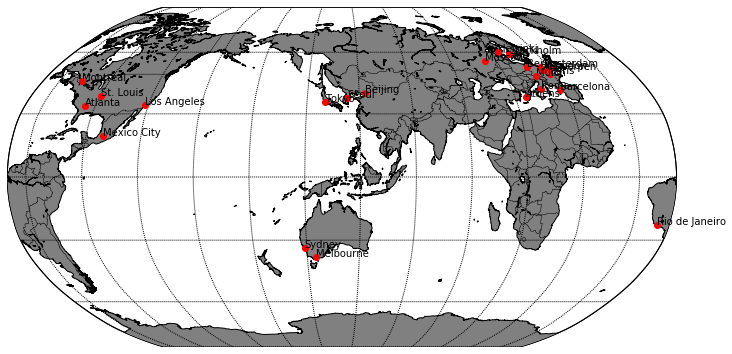

In [17]:
rcParams['figure.figsize'] = (12,8) #规定图形大小
my_map = Basemap(projection='robin', resolution= 'l', area_thresh= 1000.0,
                lat_0 = 0, lon_0 = 130)
my_map.drawcoastlines() #海平线
my_map.drawcountries() #国家区域面积
my_map.fillcontinents(color = 'gray')
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0,360,30))
my_map.drawparallels(np.arange(-90,90,30))

lons = list(data['Lng'])
lats = list(data['Lat'])
x,y = my_map(lons,lats)
my_map.plot(x,y,'ro',markersize = 6)
labels = list(data['City'])
for label, xpt, ypt in zip(labels, x,y): #多个list做operation
    plt.text(xpt,ypt,label)
plt.show()
